# importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w
import scaling as s

# class assignment

* Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

* Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data? the scaled data has kept the same shape as the original data, but the values are different.

* Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

* Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


* Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

# Acquire data

In [2]:
df = w.get_zillow_data()

# Split data

In [3]:
train, validate, test = w.train_validate_test(df)

In [4]:
# check shape
train.shape, validate.shape, test.shape

((1284141, 10), (428047, 10), (428047, 10))

In [5]:
# check head
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,tax_rate,price_per_sqft,age
1268902,4.0,2.0,2235.0,377671.0,1977.0,4175.02,6059,0.011055,168.980313,40.0
613034,3.0,2.5,1975.0,687000.0,1967.0,7097.42,6059,0.010331,347.848101,50.0
2040503,4.0,2.0,1796.0,625494.0,1963.0,11386.63,6037,0.018204,348.270601,54.0
2045869,3.0,2.5,2607.0,557360.0,2000.0,6353.84,6111,0.011400,213.793633,17.0
744180,4.0,2.0,1792.0,205082.0,1957.0,2579.19,6037,0.012576,114.443080,60.0


# scale data

In [6]:
# create scaler
col = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']
train_scaled, validate_scaled, test_scaled = s.min_max_scaling(train, validate, test, col)

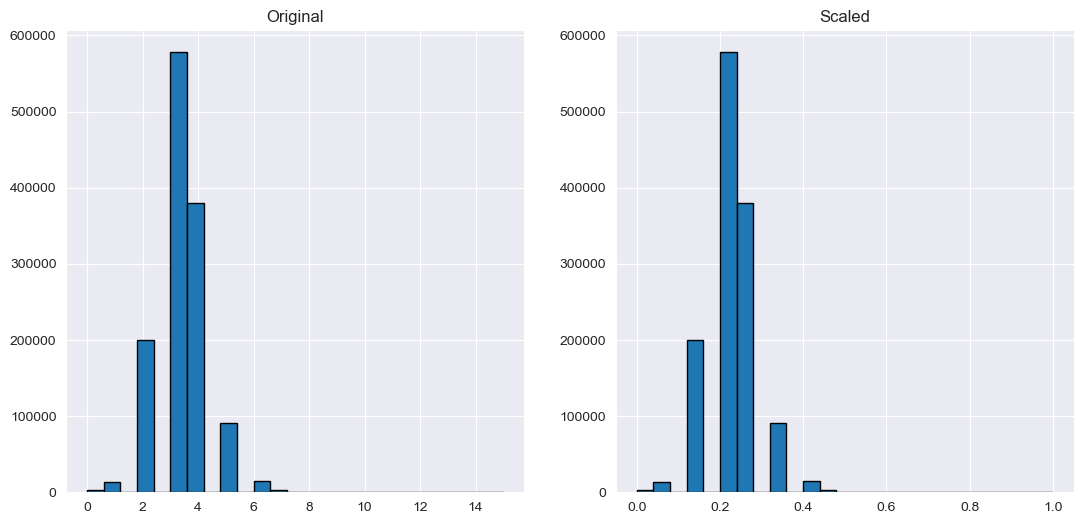

In [7]:
# visualize the results for the unscaled and scaled distribution
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.bedroomcnt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.bedroomcnt, bins=25, ec='black')
plt.title('Scaled')
plt.show()

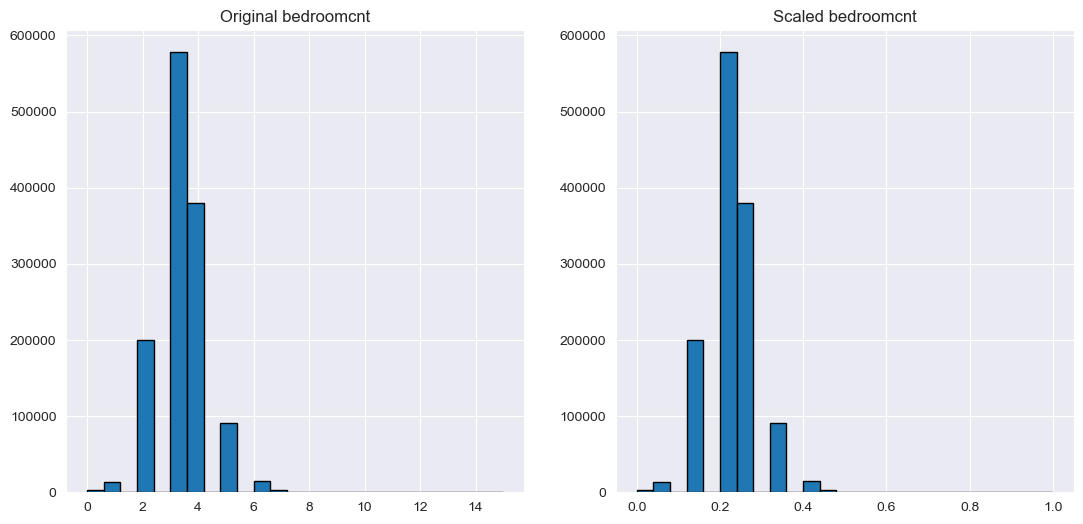

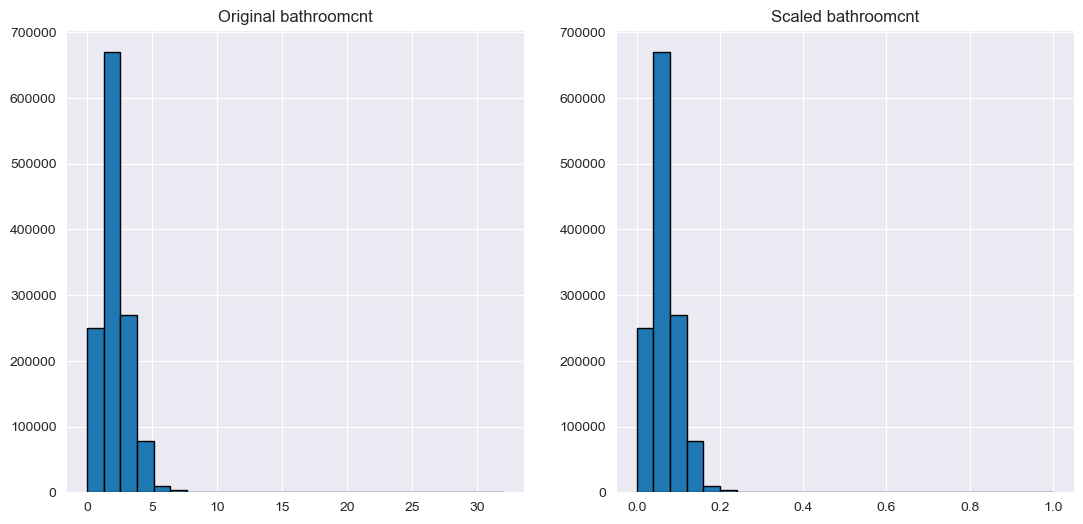

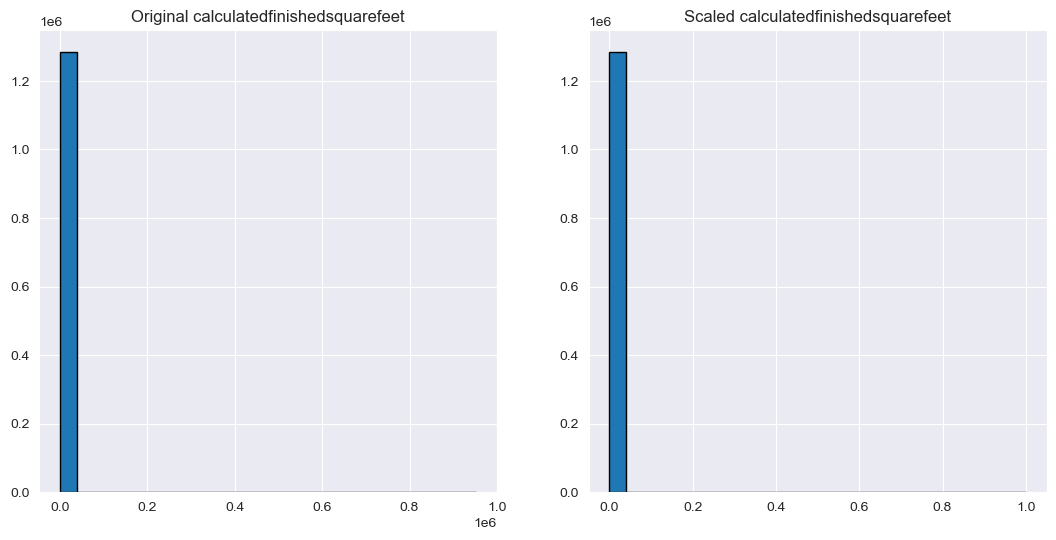

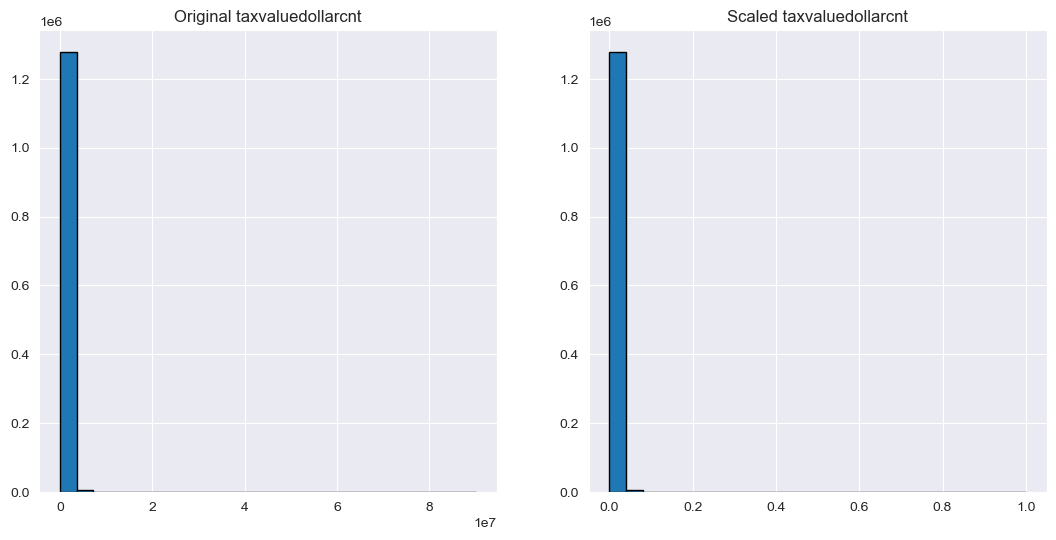

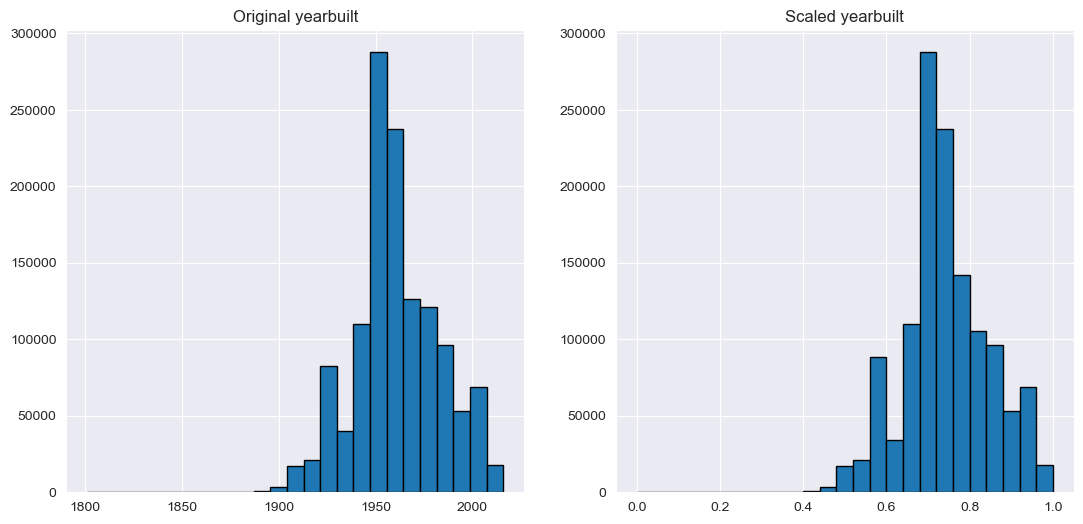

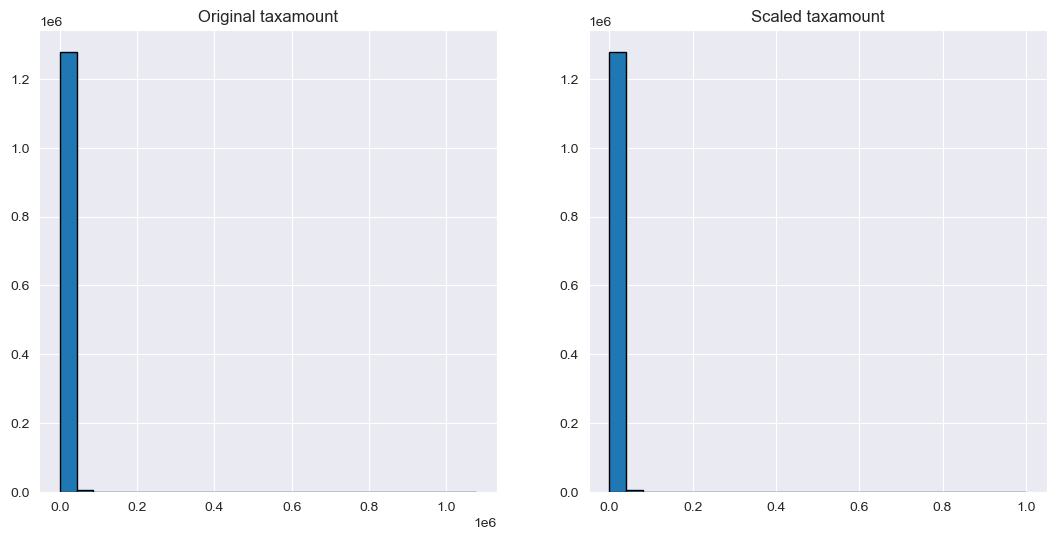

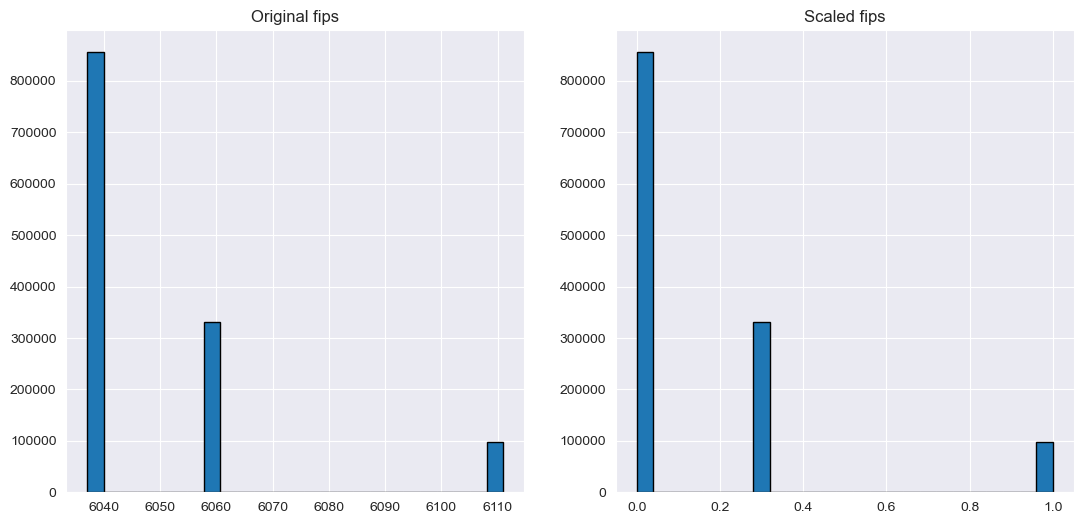

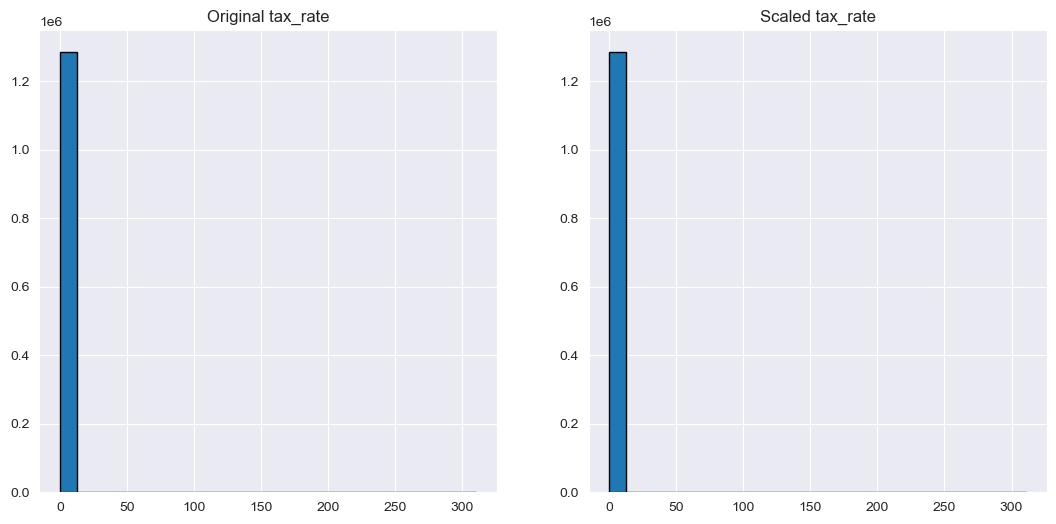

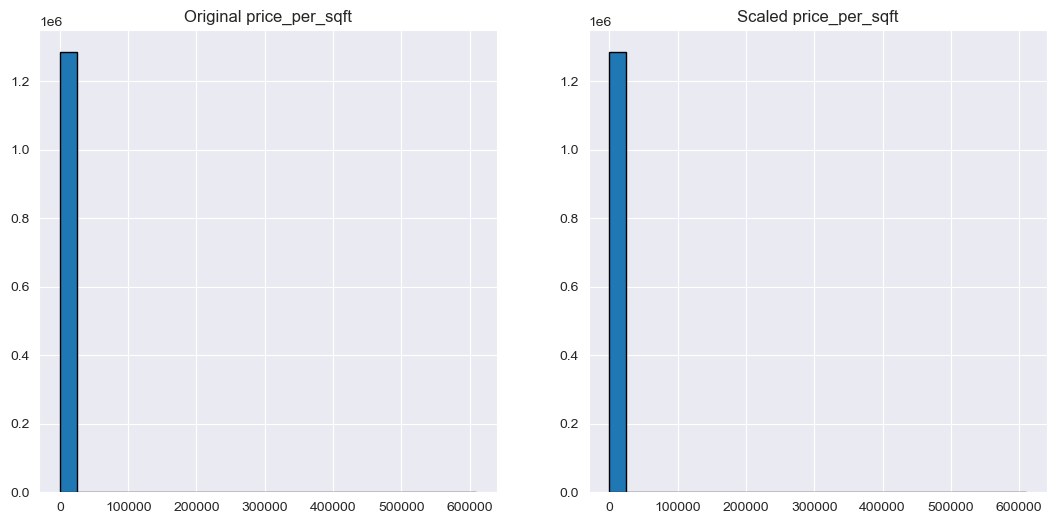

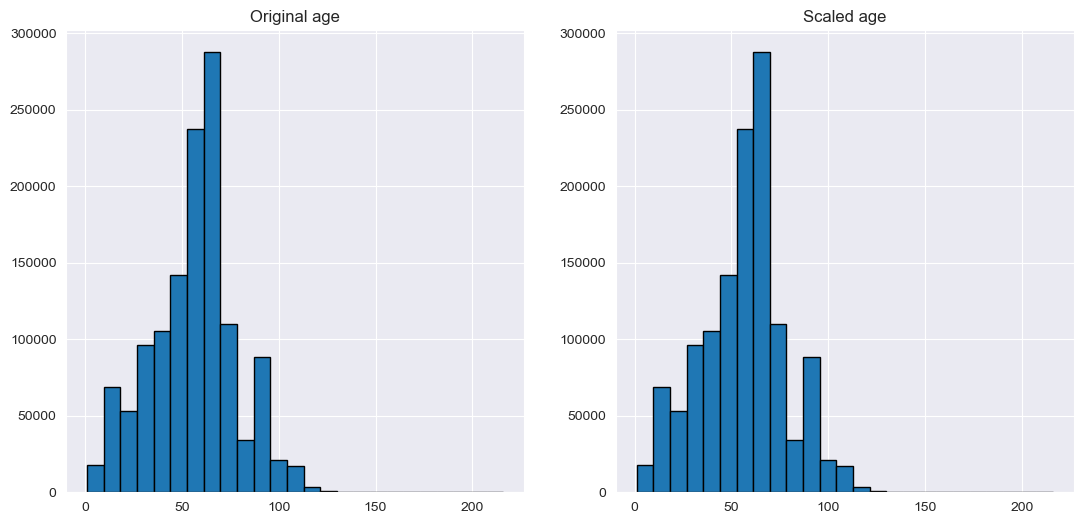

In [8]:
for i in train.columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[i], bins=25, ec='black')
    plt.title(f'Original {i}')
    plt.subplot(122)
    plt.hist(train_scaled[i], bins=25, ec='black')
    plt.title(f'Scaled {i}')
    plt.show()

In [9]:
# Apply robust scaler
train_scaled, validate_scaled, test_scaled = s.robust_scaling(train, validate, test, col)

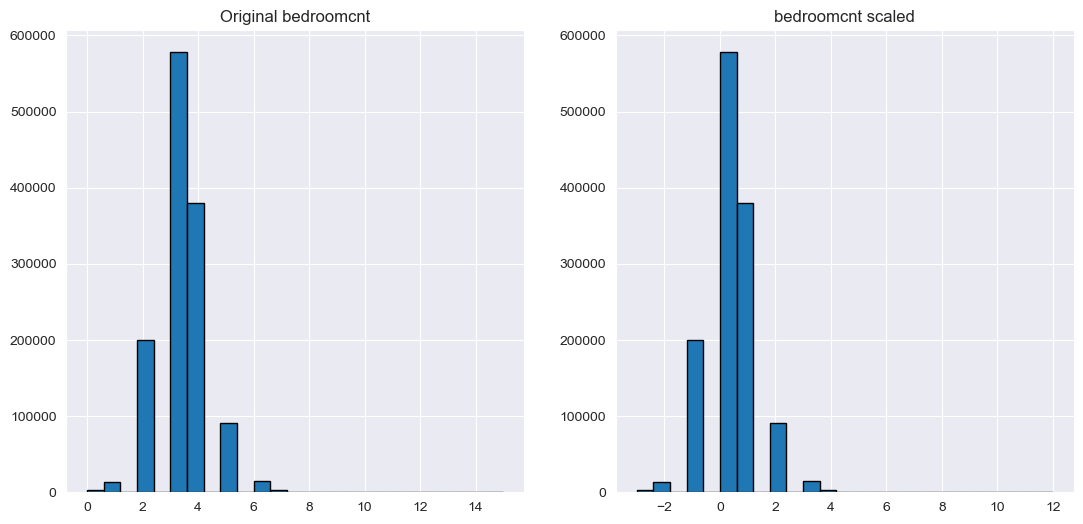

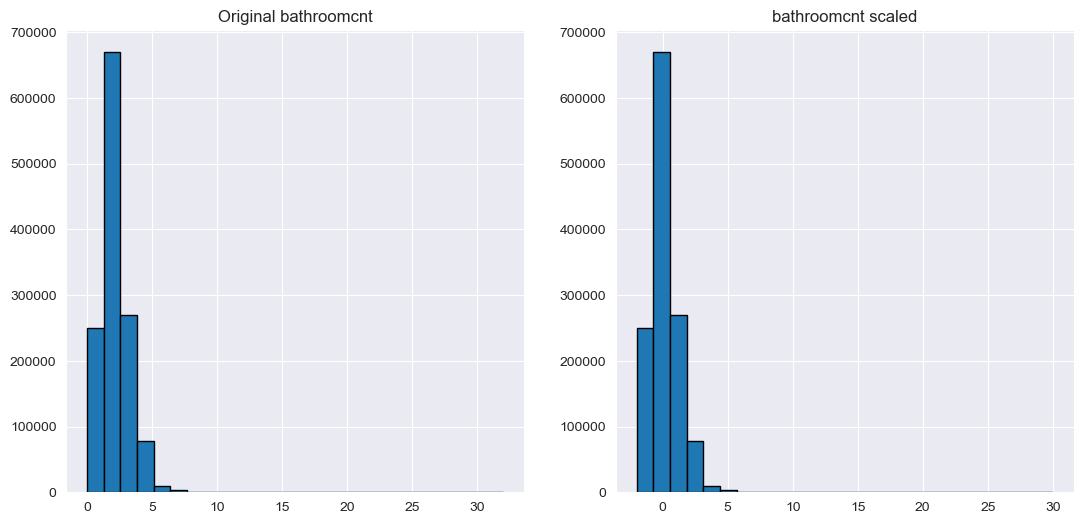

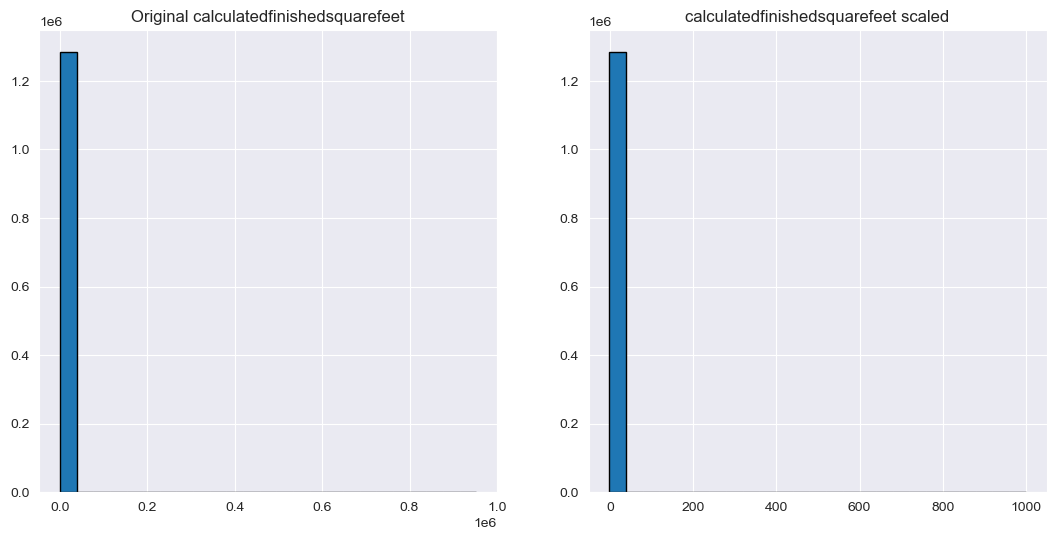

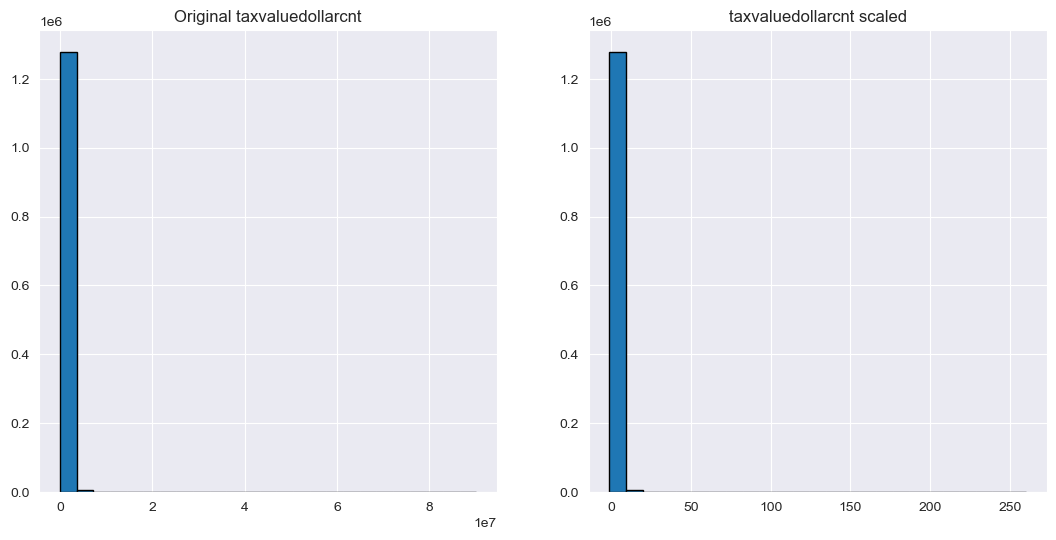

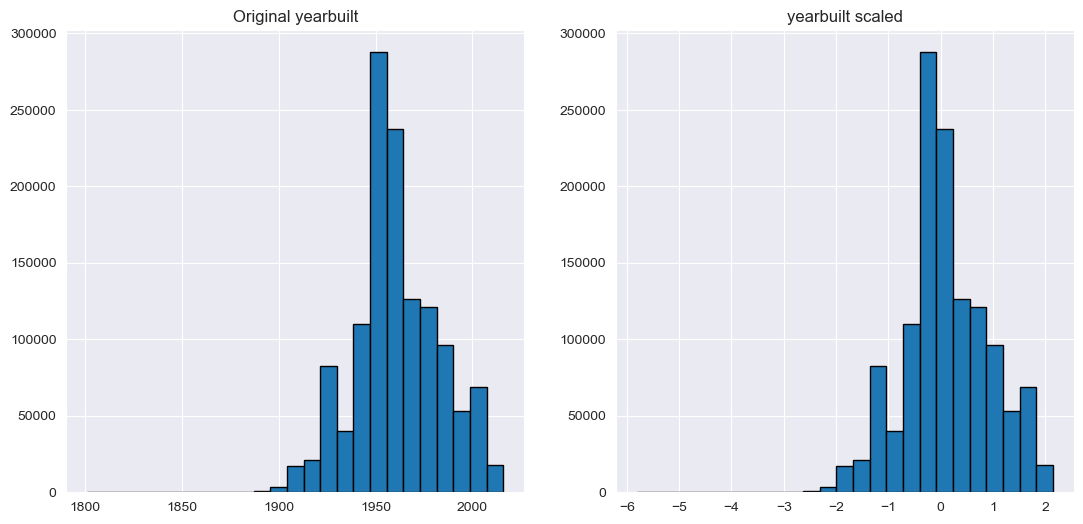

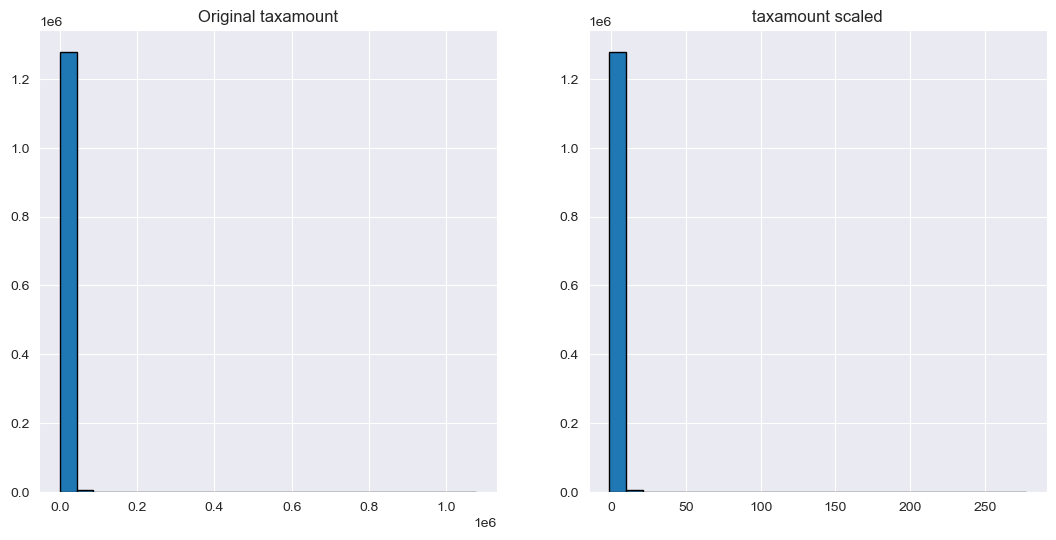

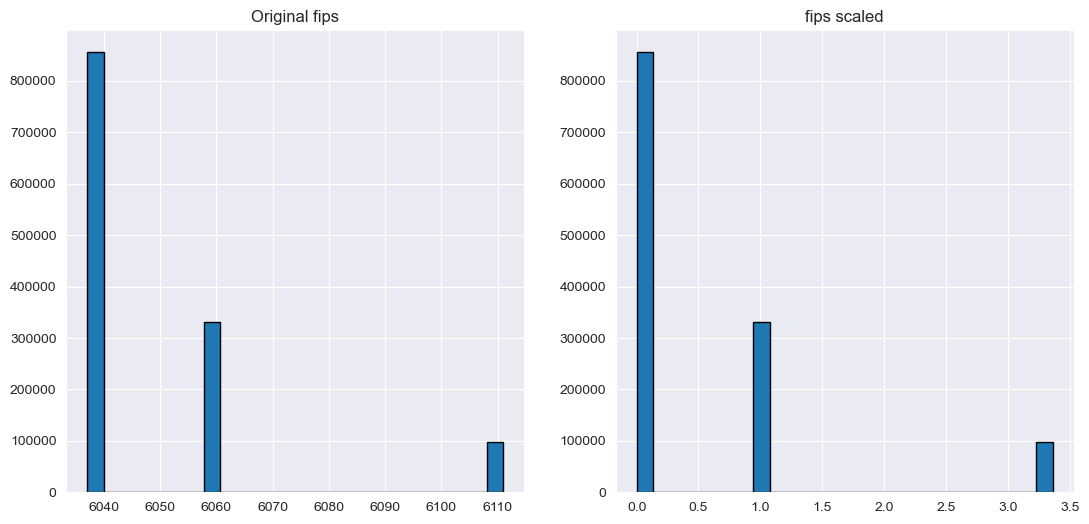

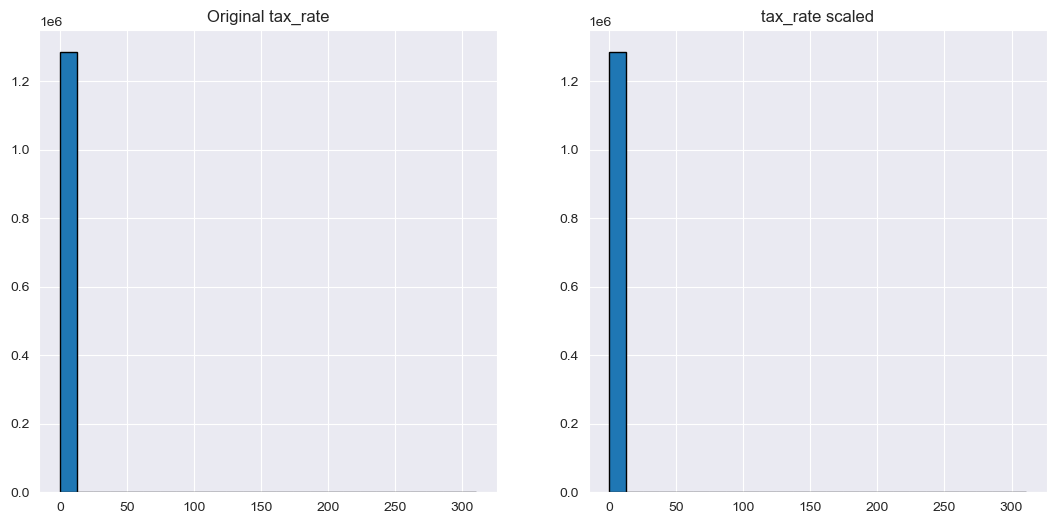

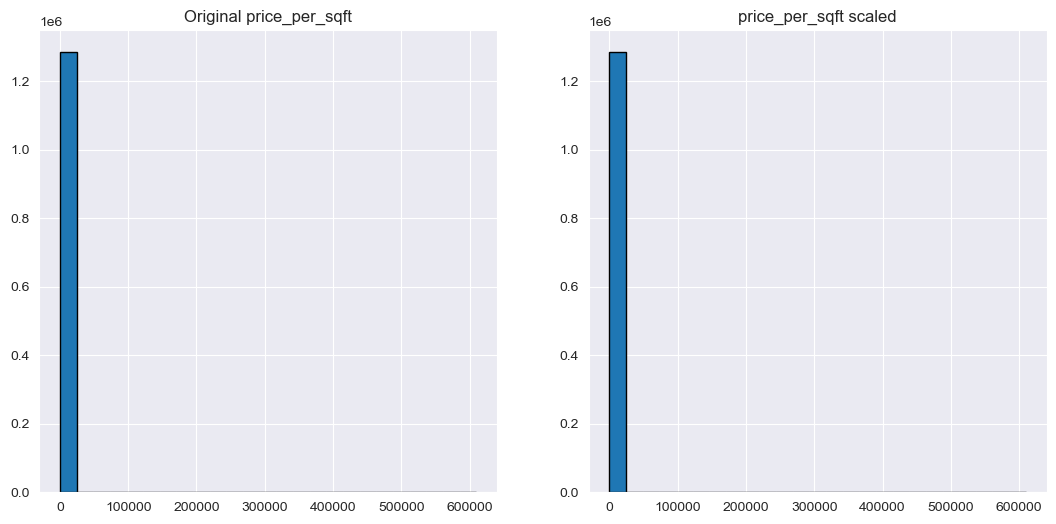

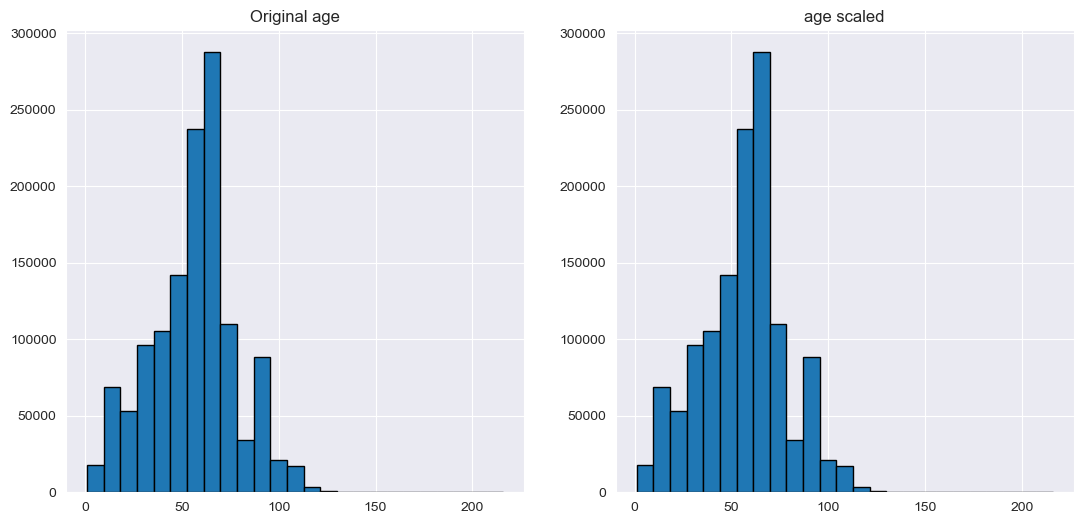

In [10]:
# visualize the results for the unscaled and scaled distribution
s.visualize_scaled_vs_unscaled(train, train_scaled)

In [11]:
# apply standard scaler
train_scaled, validate_scaled, test_scaled = s.standard_scaling(train, validate, test, col)


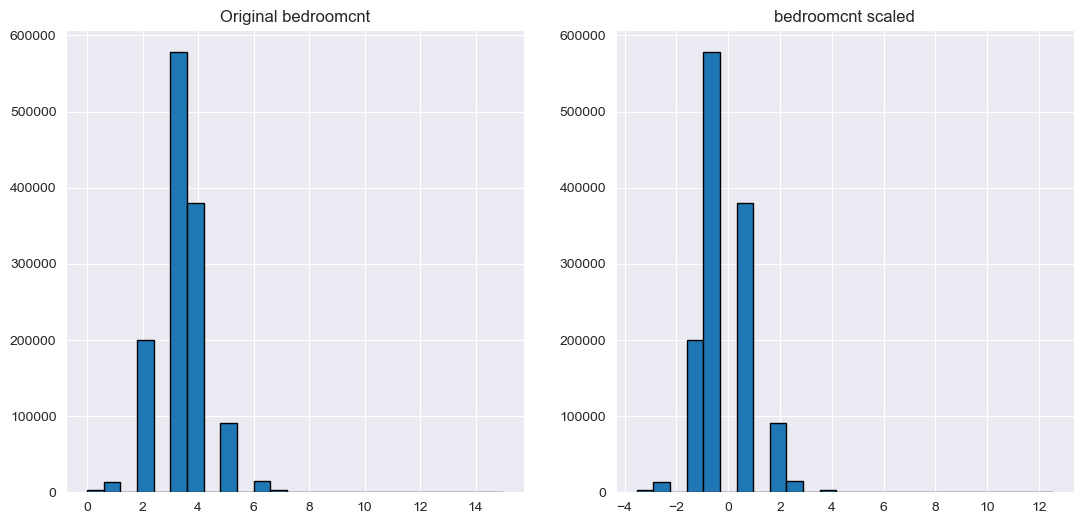

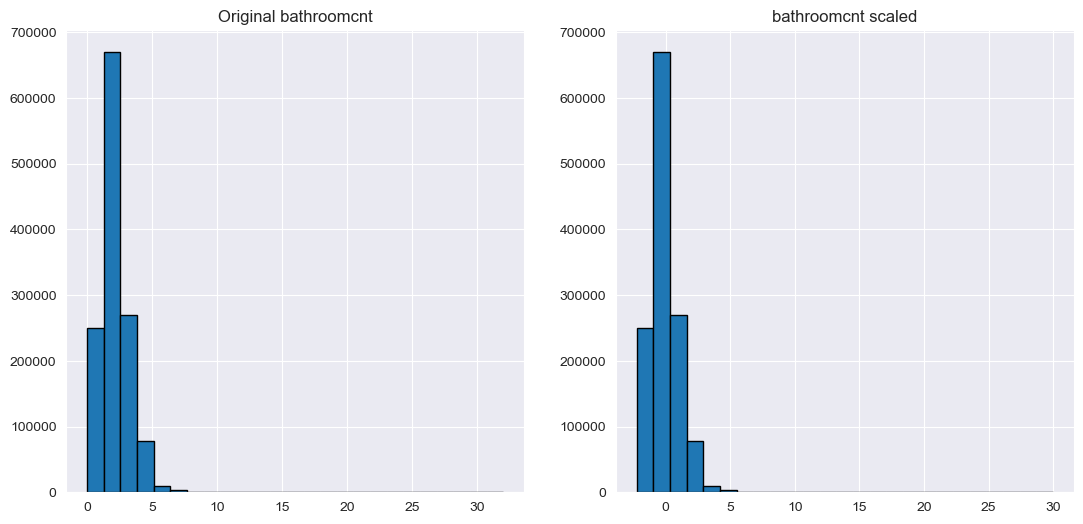

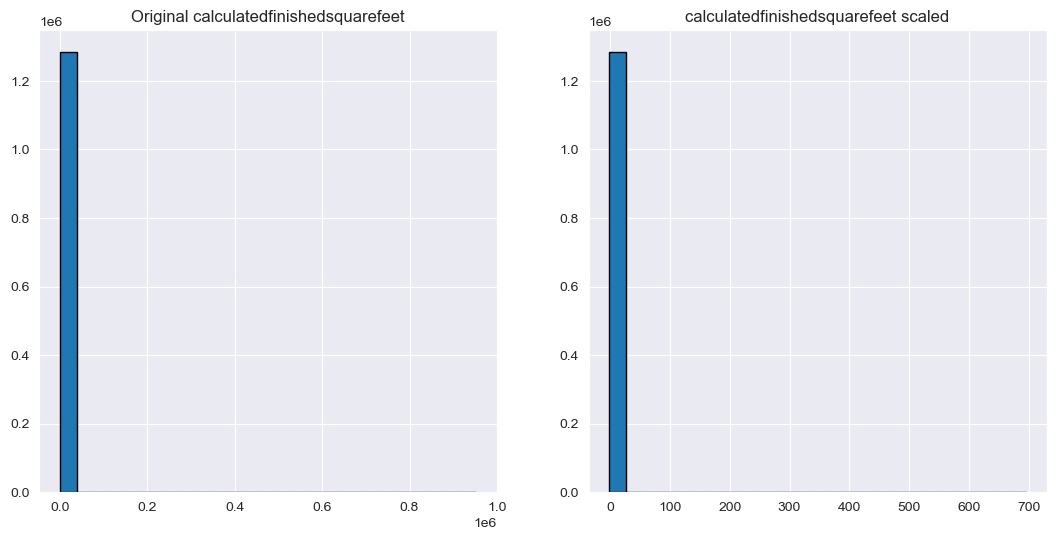

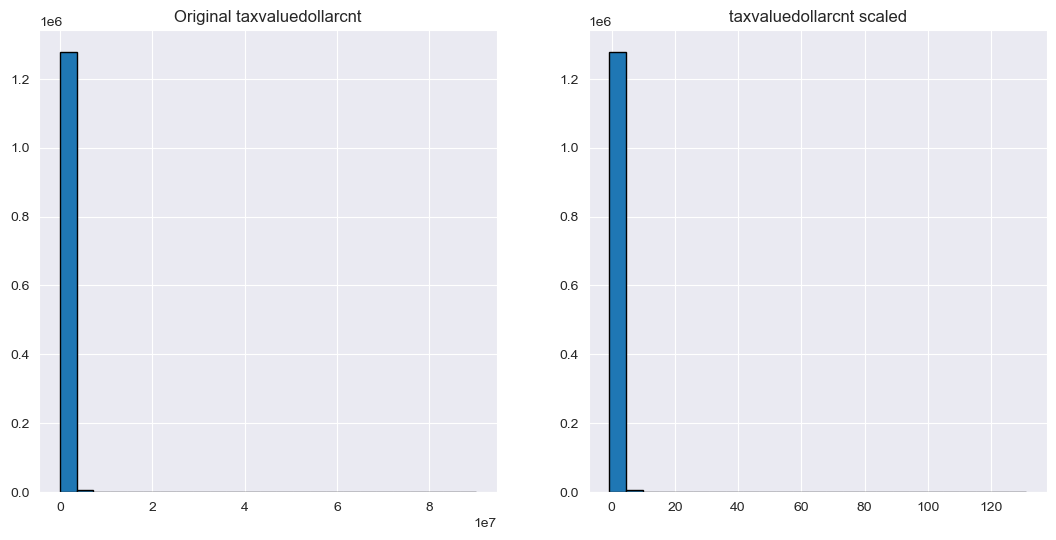

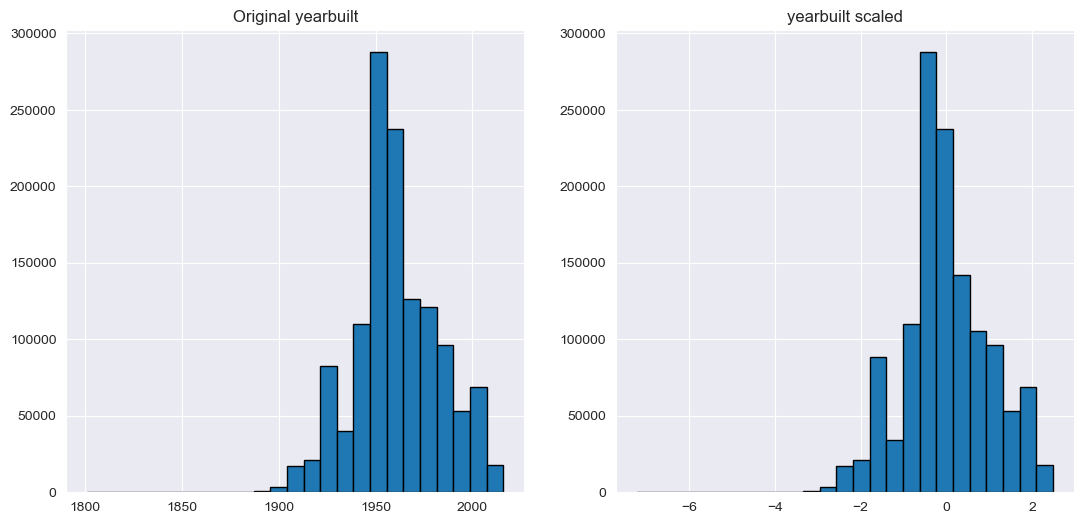

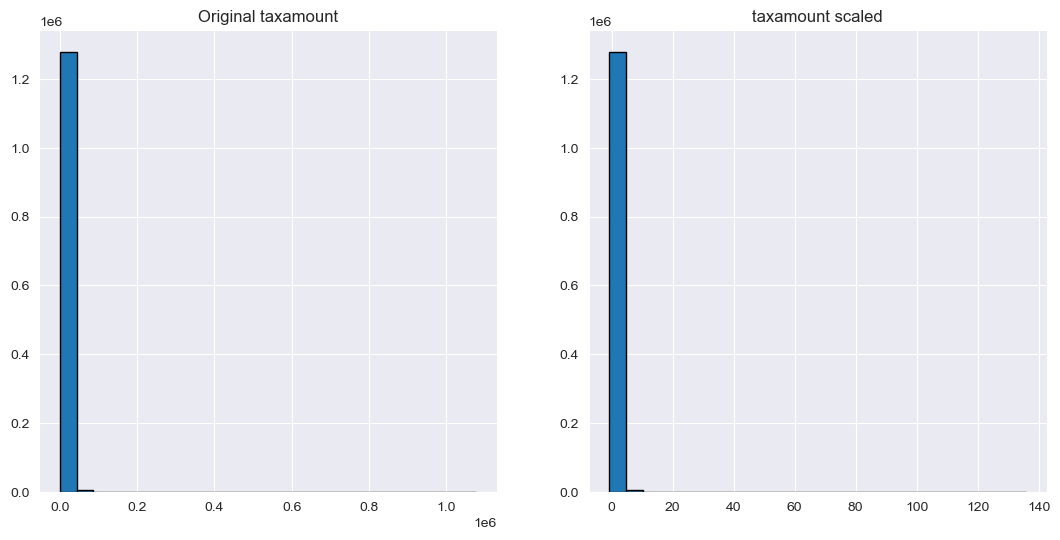

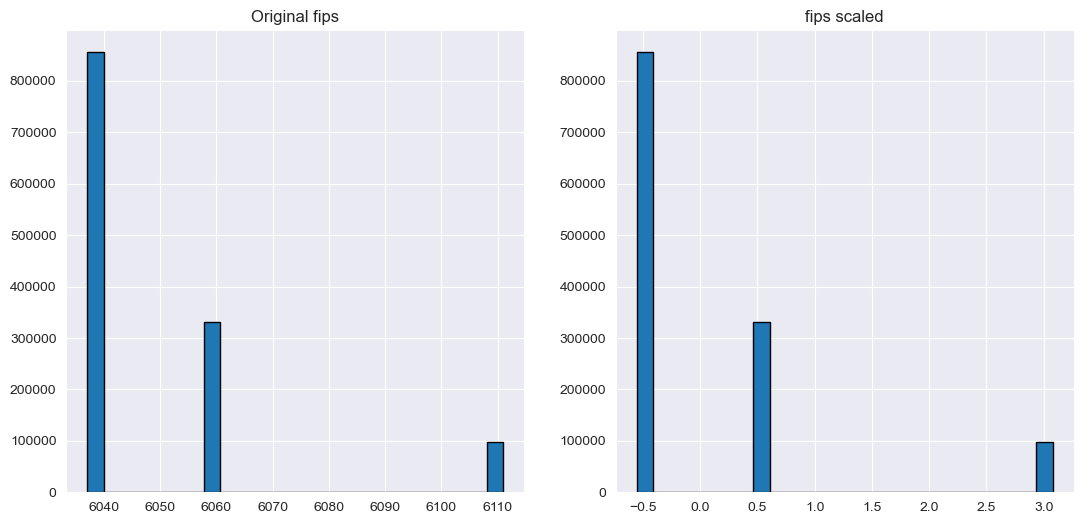

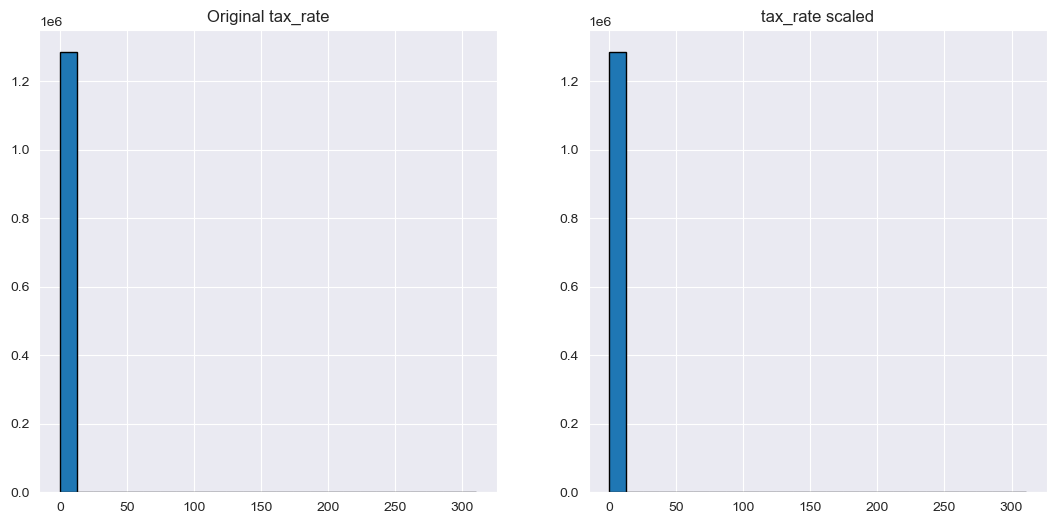

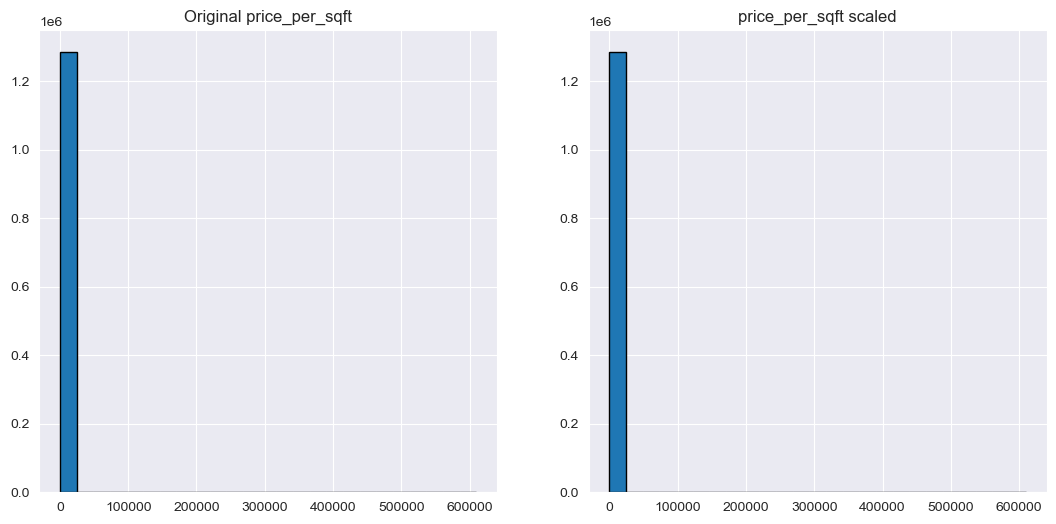

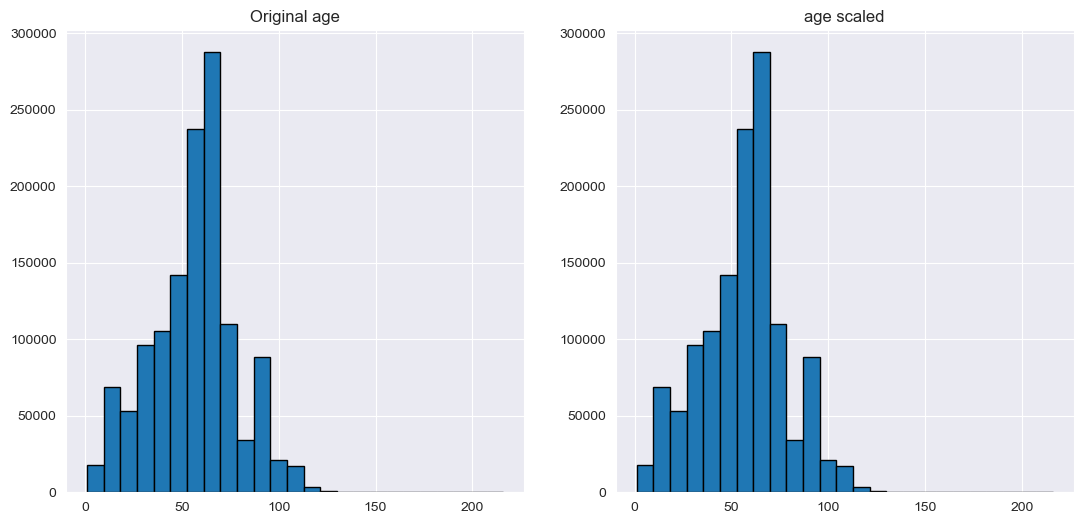

In [12]:
# visualize the results for the unscaled and scaled distribution
s.visualize_scaled_vs_unscaled(train, train_scaled)

In [13]:
# apply quantile transformer
train_scaled, validate_scaled, test_scaled = s.quantile_transformer(train, validate, test, col)

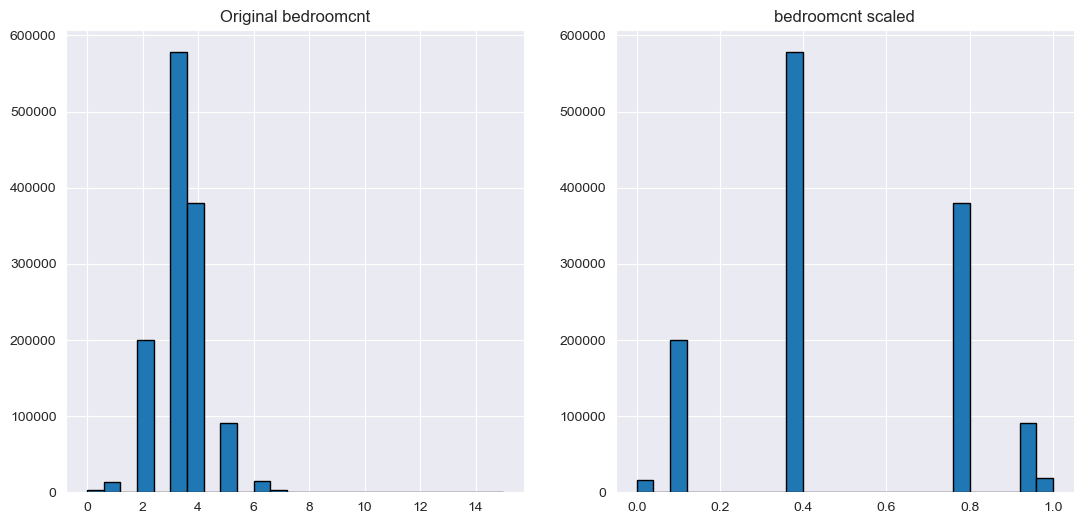

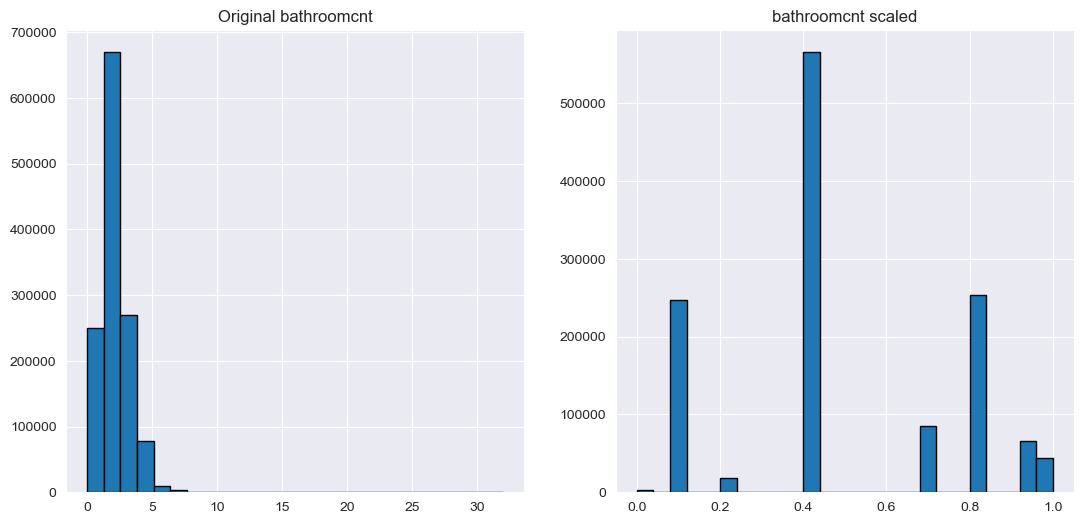

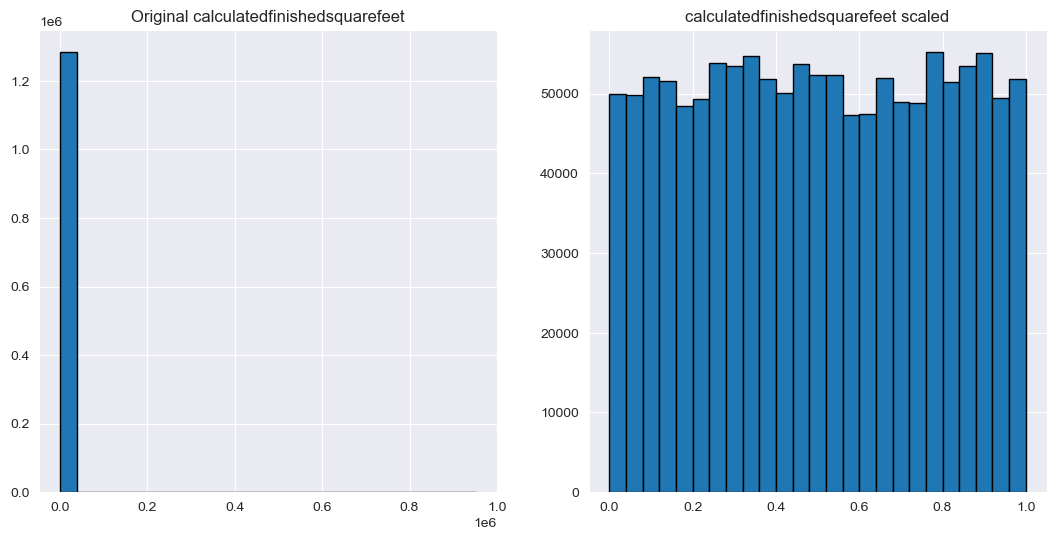

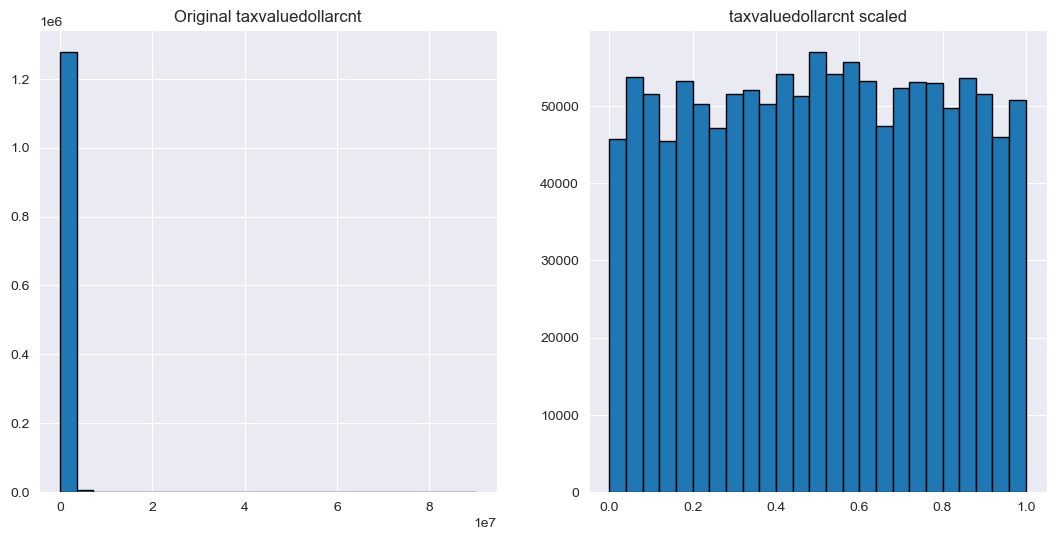

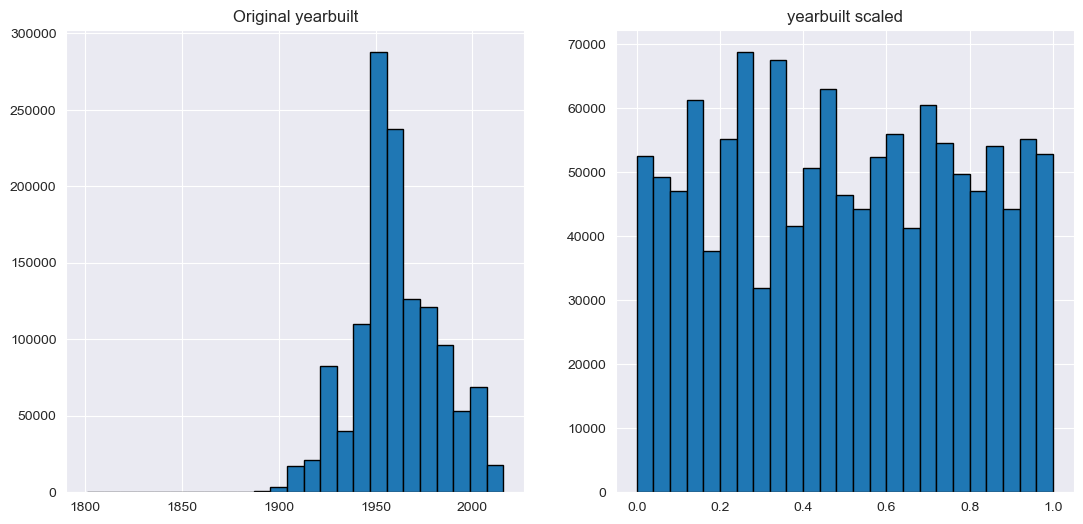

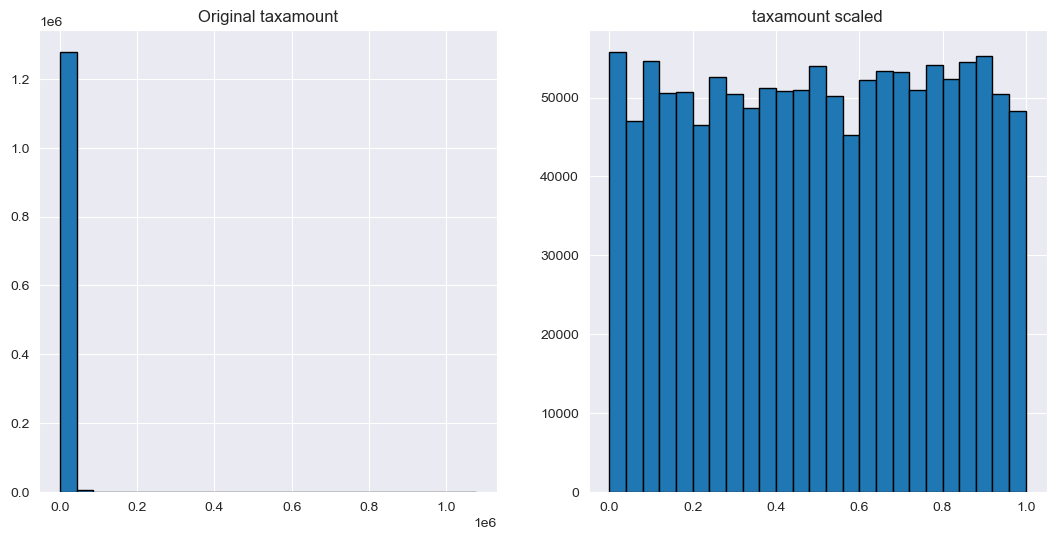

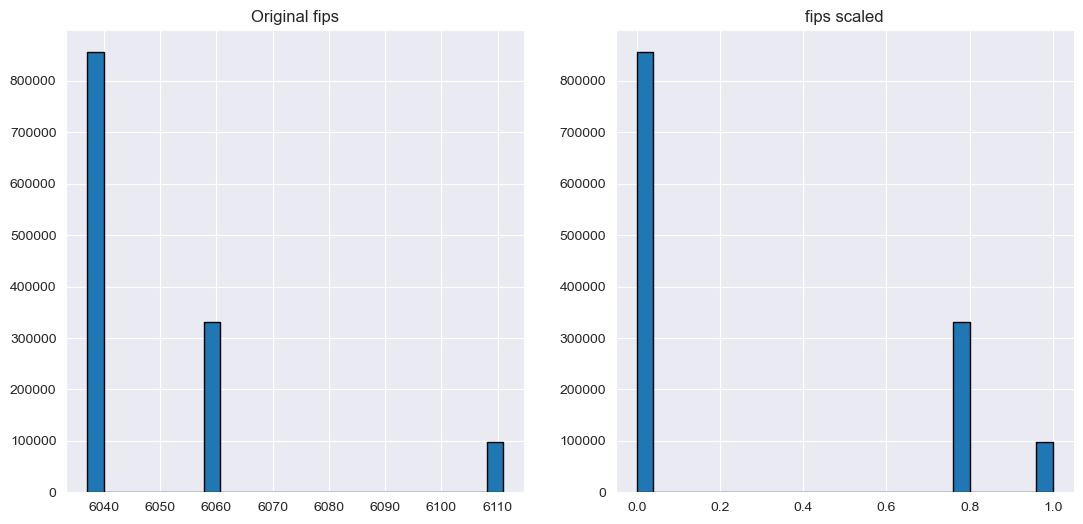

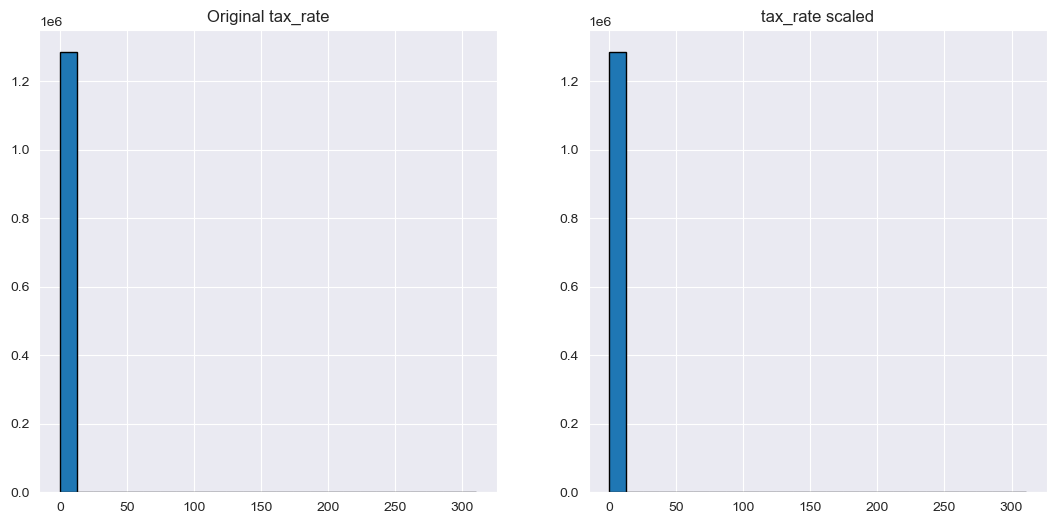

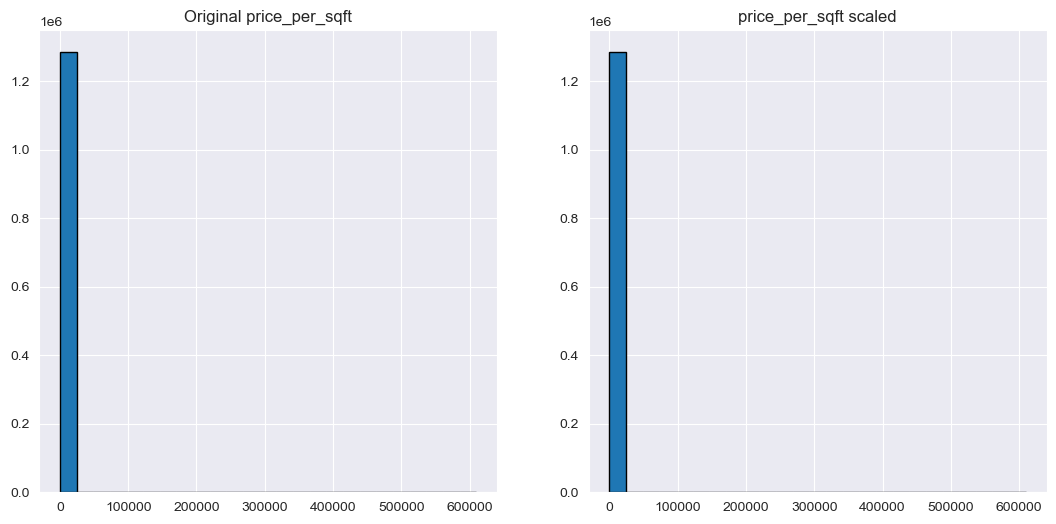

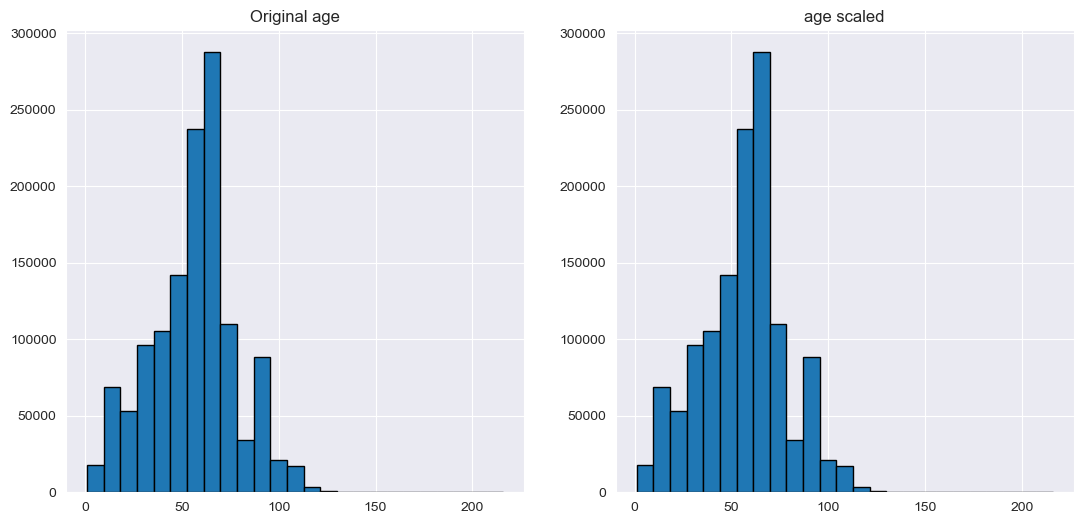

In [14]:
# visualize the results for the unscaled and scaled distribution
s.visualize_scaled_vs_unscaled(train, train_scaled)

In [15]:
# Function to split and scale data
def split_scale(df, col):
    '''
    This function takes in a dataframe
    splits into train, validate, and test
    then applies min max scaler to the data
    returns train, validate, test
    '''
    # split data
    train, validate, test = w.train_validate_test(df)
    # create scaler
    train_scaled, validate_scaled, test_scaled = s.min_max_scaling(train, validate, test, col)
    return train, validate, test, train_scaled, validate_scaled, test_scaled